<h1><center>Laboratorio 9: Optimización de modelos 💯</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamín Aguilar.
- Nombre de alumno 2: Sebastián Vásquez.


### Temas a tratar

- Predicción de demanda usando `xgboost`
- Búsqueda del modelo óptimo de clasificación usando `optuna`
- Uso de pipelines.

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio

- Optimizar modelos usando `optuna`
- Recurrir a técnicas de *prunning*
- Forzar el aprendizaje de relaciones entre variables mediante *constraints*
- Fijar un pipeline con un modelo base que luego se irá optimizando.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### **Link de repositorio de GitHub:** `http://....`

# Importamos librerias útiles

In [85]:
!pip install -qq xgboost optuna

# El emprendimiento de Fiu

Tras liderar de manera exitosa la implementación de un proyecto de ciencia de datos para caracterizar los datos generados en Santiago 2023, el misterioso corpóreo **Fiu** se anima y decide levantar su propio negocio de consultoría en machine learning. Tras varias e intensas negociaciones, Fiu logra encontrar su *primera chamba*: predecir la demanda (cantidad de venta) de una famosa productora de bebidas de calibre mundial. Como usted tuvo un rendimiento sobresaliente en el proyecto de caracterización de datos, Fiu lo contrata como *data scientist* de su emprendimiento.

Para este laboratorio deben trabajar con los datos `sales.csv` subidos a u-cursos, el cual contiene una muestra de ventas de la empresa para diferentes productos en un determinado tiempo.

Para comenzar, cargue el dataset señalado y visualice a través de un `.head` los atributos que posee el dataset.

<i><p align="center">Fiu siendo felicitado por su excelente desempeño en el proyecto de caracterización de datos</p></i>
<p align="center">
  <img src="https://media-front.elmostrador.cl/2023/09/A_UNO_1506411_2440e.jpg">
</p>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_csv('sales.csv')
df['date'] = pd.to_datetime(df['date'])

df.head()

C:\Users\sebas\AppData\Local\Temp\ipykernel_13592\3184305967.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,glass,500ml,0.96,13280
1,1,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,plastic,1.5lt,2.86,6727
2,2,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,can,330ml,0.87,9848
3,3,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,glass,500ml,1.00,20050
4,4,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,can,330ml,0.39,25696


## 1 Generando un Baseline (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/O-lan6TkadUAAAAC/what-i-wnna-do-after-a-baseline.gif">
</p>

Antes de entrenar un algoritmo, usted recuerda los apuntes de su magíster en ciencia de datos y recuerda que debe seguir una serie de *buenas prácticas* para entrenar correcta y debidamente su modelo. Después de un par de vueltas, llega a las siguientes tareas:

1. Separe los datos en conjuntos de train (70%), validation (20%) y test (10%). Fije una semilla para controlar la aleatoriedad.
2. Implemente un `FunctionTransformer` para extraer el día, mes y año de la variable `date`. Guarde estas variables en el formato categorical de pandas.
3. Implemente un `ColumnTransformer` para procesar de manera adecuada los datos numéricos y categóricos. Use `OneHotEncoder` para las variables categóricas.
4. Guarde los pasos anteriores en un `Pipeline`, dejando como último paso el regresor `DummyRegressor` para generar predicciones en base a promedios.
5. Entrene el pipeline anterior y reporte la métrica `mean_absolute_error` sobre los datos de validación. ¿Cómo se interpreta esta métrica para el contexto del negocio?
6. Finalmente, vuelva a entrenar el `Pipeline` pero esta vez usando `XGBRegressor` como modelo **utilizando los parámetros por default**. ¿Cómo cambia el MAE al implementar este algoritmo? ¿Es mejor o peor que el `DummyRegressor`?
7. Guarde ambos modelos en un archivo .pkl (uno cada uno)

In [32]:
# Inserte su código acá
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
SEED = 40
#1
X_train,X_aux,y_train,y_aux= train_test_split(df.loc[:, df.columns != 'quantity'],df.loc[:,"quantity"],test_size=0.3,random_state=SEED)
X_val,X_test,y_val,y_test = train_test_split(X_aux,y_aux,test_size=0.33,random_state=SEED)

y_train = 
#2
def transform_date(X):
    X["day"] = X.date.apply(lambda x: x.day).astype("category")
    X["month"] = X.date.apply(lambda x: x.month).astype("category")
    X["year"] = X.date.apply(lambda x: x.year).astype("category")
    return X.loc[:,X.columns!='date']

extract_fun = FunctionTransformer(transform_date)
#3
col_transformer = ColumnTransformer([("one_hot_encoder",OneHotEncoder(sparse_output=False,handle_unknown='ignore'),["day","month","year","shop","brand","container","capacity","lat"]),
                                     ("min_max_scaler",MinMaxScaler(),["price"])], remainder="drop")

col_transformer.set_output(transform='pandas')
#4
pipeline_dummy = Pipeline([("modify_date",extract_fun),
                     ("col_transformer",col_transformer),
                     ("regressor",DummyRegressor(strategy="mean"))])

In [33]:
#5
pipeline_dummy.fit(X_train,y_train)
mean_absolute_error(y_val,pipeline_dummy.predict(X_val))

13688.153453119203

Esto quiere decir que de media se está prediciendo que la demanda es o 13688 más que el valor real o 13688 menos que el valor real. Esto claramente es malo en el contexto de negocio, pues el vendedor estaría teniendo o demaciada mercadería o muy poca, lo cual puede provocar el no vender todo o vender muy rápido, incurriendo en potenciales pérdidas.

In [34]:
#6
from xgboost import XGBRegressor
pipeline_xgb = Pipeline(pipeline_dummy.steps[:-1]+[('regressor',XGBRegressor(random_state=SEED))])
pipeline_xgb.fit(X_train,y_train)
mean_absolute_error(y_val,pipeline_xgb.predict(X_val))

2379.745959619336

Mejora bastante el MAE al utilizar XGBRegressor, lo cual es normal, pues logra captar y aprender de cierta manera el ajuste de los datos.

In [11]:
#7
import pickle
pickle.dump(pipeline_dummy["regressor"],open('dummy.pkl','wb'))
pickle.dump(pipeline_xgb["regressor"],open('xgb.pkl','wb'))

## 2. Forzando relaciones entre parámetros con XGBoost (1.0 puntos)

<p align="center">
  <img src="https://64.media.tumblr.com/14cc45f9610a6ee341a45fd0d68f4dde/20d11b36022bca7b-bf/s640x960/67ab1db12ff73a530f649ac455c000945d99c0d6.gif">
</p>

Un colega aficionado a la economía le *sopla* que la demanda guarda una relación inversa con el precio del producto. Motivado para impresionar al querido corpóreo, se propone hacer uso de esta información para mejorar su modelo realizando las siguientes tareas:

1. Vuelva a entrenar el `Pipeline`, pero esta vez forzando una relación monótona negativa entre el precio y la cantidad. Para aplicar esta restricción apóyese en la siguiente <a href = https://xgboost.readthedocs.io/en/stable/tutorials/monotonic.html>documentación</a>. Hint: Para implementar el constraint se le sugiere hacerlo especificando el nombre de la variable. De ser así, probablemente le sea útil **mantener el formato de pandas** antes del step de entrenamiento.

2. Luego, vuelva a reportar el `MAE` sobre el conjunto de validación.

3. ¿Cómo cambia el error al incluir esta relación? ¿Tenía razón su amigo?




In [78]:
# Inserte su código acá

pipeline_xgb_wconstraints = Pipeline([pipeline_xgb.steps[0],pipeline_xgb.steps[1],("regressor",XGBRegressor(monotone_constraints={"min_max_scaler__price":-1}))])

In [79]:
pipeline_xgb_wconstraints.fit(X_train,y_train)

Pipeline(steps=[('modify_date',
                 FunctionTransformer(func=<function transform_date at 0x000001A7032FE950>)),
                ('col_transformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['day', 'month', 'year',
                                                   'shop', 'brand', 'container',
                                                   'capacity', 'lat']),
                                                 ('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['price'])])),
                ('r...
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints={'min_max_scaler__price': -1},
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

In [80]:
mean_absolute_error(y_val,pipeline_xgb_wconstraints.predict(X_val))

2438.5056939322417

En este caso empeora el resultado, sin embargo, esto no quiere decir que el amigo no tenía razón, pues, tal como se ve en el gráfico desplegado, esa tendencia es real, sin embargo, esto no implica que se obtengan resultados más óptimos sobre un conjunto que el regresor nunca ha visto.

Text(0, 0.5, 'quantity')

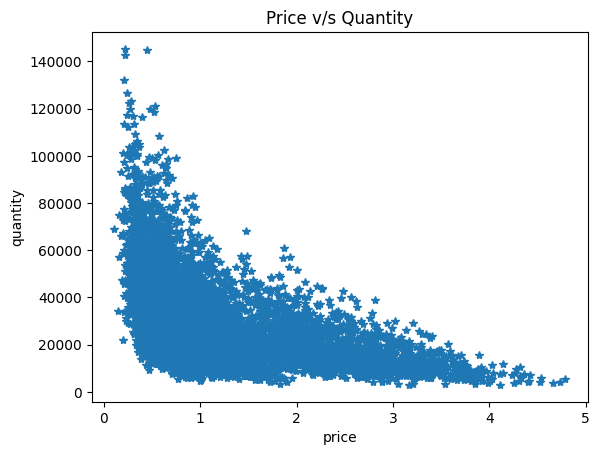

In [104]:
from matplotlib import pyplot as plt
plt.plot(df.price,df.quantity,'*')
plt.title("Price v/s Quantity")
plt.xlabel("price")
plt.ylabel("quantity")

## 3. Optimización de Hiperparámetros con Optuna (2.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/fmNdyGN4z5kAAAAi/hacking-lucy.gif">
</p>

Luego de presentarle sus resultados, Fiu le pregunta si es posible mejorar *aun más* su modelo. En particular, le comenta de la optimización de hiperparámetros con metodologías bayesianas a través del paquete `optuna`. Como usted es un aficionado al entrenamiento de modelos de ML, se propone implementar la descabellada idea de su jefe.

A partir de la mejor configuración obtenida en la sección anterior, utilice `optuna` para optimizar sus hiperparámetros. En particular, se le pide:

- Fijar una semilla en las instancias necesarias para garantizar la reproducibilidad de resultados
- Utilice `TPESampler` como método de muestreo
- De `XGBRegressor`, optimice los siguientes hiperparámetros:
    - `learning_rate` buscando valores flotantes en el rango (0.001, 0.1)
    - `n_estimators` buscando valores enteros en el rango (50, 1000)
    - `max_depth` buscando valores enteros en el rango (3, 10)
    - `max_leaves` buscando valores enteros en el rango (0, 100)
    - `min_child_weight` buscando valores enteros en el rango (1, 5)
    - `reg_alpha` buscando valores flotantes en el rango (0, 1)
    - `reg_lambda` buscando valores flotantes en el rango (0, 1)
- De `OneHotEncoder`, optimice el hiperparámetro `min_frequency` buscando el mejor valor flotante en el rango (0.0, 1.0)
- Explique cada hiperparámetro y su rol en el modelo. ¿Hacen sentido los rangos de optimización indicados?
- Fije el tiempo de entrenamiento a 5 minutos
- Reportar el número de *trials*, el `MAE` y los mejores hiperparámetros encontrados. ¿Cómo cambian sus resultados con respecto a la sección anterior? ¿A qué se puede deber esto?
- Guardar su modelo en un archivo .pkl

In [99]:
# Inserte su código acá
import optuna
from optuna.samplers import TPESampler
def objective_function(trial):
    X_train,X_aux,y_train,y_aux= train_test_split(df.loc[:, df.columns != 'quantity'],df.loc[:,"quantity"],test_size=0.3,random_state=SEED)
    X_val,X_test,y_val,y_test = train_test_split(X_aux,y_aux,test_size=0.33,random_state=SEED)

    params_xgb = {

        "learning_rate": trial.suggest_loguniform("learning_rate",0.001,0.1),
        "n_estimators": trial.suggest_int("n_estimators",50,1000),
        "max_depth": trial.suggest_int("max_depth",3,10),
        "max_leaves": trial.suggest_int("max_leaves",0,100),
        "min_child_weight": trial.suggest_int("min_child_weight",1,5),
        "reg_alpha": trial.suggest_float("reg_alpha",0,1),
        "reg_lambda": trial.suggest_float("reg_lambda",0,1)
    }
    params_one_hot_encoder = {"sparse_output":False,
                              "handle_unknown":"ignore",
        "min_frequency":trial.suggest_float("min_frequency",0,1)}

    extract_fun = FunctionTransformer(transform_date)
    col_transformer = ColumnTransformer([("one_hot_encoder",OneHotEncoder(**params_one_hot_encoder),["day","month","year","shop","brand","container","capacity","lat"]),
                                     ("min_max_scaler",MinMaxScaler(),["price"])], remainder="drop")
    pipeline_to_optimize = Pipeline([("date_fun",extract_fun),("col_transformer",col_transformer),("regressor",XGBRegressor(seed=SEED,**params_xgb))])
    pipeline_to_optimize.fit(X_train,y_train)

    yhat = pipeline_to_optimize.predict(X_val)
    return mean_absolute_error(y_val,yhat)
study = optuna.create_study(direction="minimize",sampler=TPESampler())
study.optimize(objective_function,timeout=300)


[I 2024-06-02 20:07:09,043] A new study created in memory with name: no-name-88dc1874-0bf3-49c9-a163-3f8666cdb99f
C:\Users\sebas\AppData\Local\Temp\ipykernel_13592\3284861836.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate",0.001,0.1),
[I 2024-06-02 20:07:09,934] Trial 0 finished with value: 10617.760583121246 and parameters: {'learning_rate': 0.04344899593524401, 'n_estimators': 679, 'max_depth': 6, 'max_leaves': 50, 'min_child_weight': 5, 'reg_alpha': 0.9386103073634827, 'reg_lambda': 0.7279483635251054, 'min_frequency': 0.9113149596985826}. Best is trial 0 with value: 10617.760583121246.
C:\Users\sebas\AppData\Local\Temp\ipykernel_13592\3284861836.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Los hiperparámetros a optimizar son los siguientes:
Explicar, rol en el model y hace sentido los rangos?
- learning_rate: 
- max_depth
- max_leaves
- min_child_weight:
- n_estimators:
- reg_alpha:
- reg_lambda:
- min_frequency:

In [100]:
df_trials = study.trials_dataframe(multi_index=True)
len(df_trials)

254

Se muestran los parámetros con el mínimo MAE obtenido

In [101]:
df_trials[df_trials.value==df_trials.value.min()]

number        value             datetime_start          datetime_complete  \
                                                                                
248    248  2013.497411 2024-06-02 20:12:00.970558 2024-06-02 20:12:02.312858   

                  duration        params                       \
                           learning_rate max_depth max_leaves   
248 0 days 00:00:01.342300      0.088414         8         68   

                                                                         state  
    min_child_weight min_frequency n_estimators reg_alpha reg_lambda            
248                5      0.029266         1000  0.879788   0.242933  COMPLETE

## 4. Optimización de Hiperparámetros con Optuna y Prunners (1.7)

<p align="center">
  <img src="https://i.pinimg.com/originals/90/16/f9/9016f919c2259f3d0e8fe465049638a7.gif">
</p>

Después de optimizar el rendimiento de su modelo varias veces, Fiu le pregunta si no es posible optimizar el entrenamiento del modelo en sí mismo. Después de leer un par de post de personas de dudosa reputación en la *deepweb*, usted llega a la conclusión que puede cumplir este objetivo mediante la implementación de **Prunning**.

Vuelva a optimizar los mismos hiperparámetros que la sección pasada, pero esta vez utilizando **Prunning** en la optimización. En particular, usted debe:

- Responder: ¿Qué es prunning? ¿De qué forma debería impactar en el entrenamiento?
- Utilizar `optuna.integration.XGBoostPruningCallback` como método de **Prunning**
- Fijar nuevamente el tiempo de entrenamiento a 5 minutos
- Reportar el número de *trials*, el `MAE` y los mejores hiperparámetros encontrados. ¿Cómo cambian sus resultados con respecto a la sección anterior? ¿A qué se puede deber esto?
- Guardar su modelo en un archivo .pkl

Nota: Si quieren silenciar los prints obtenidos en el prunning, pueden hacerlo mediante el siguiente comando:

```
optuna.logging.set_verbosity(optuna.logging.WARNING)
```

De implementar la opción anterior, pueden especificar `show_progress_bar = True` en el método `optimize` para *más sabor*.

Hint: Si quieren especificar parámetros del método .fit() del modelo a través del pipeline, pueden hacerlo por medio de la siguiente sintaxis: `pipeline.fit(stepmodelo__parametro = valor)`

Hint2: Este <a href = https://stackoverflow.com/questions/40329576/sklearn-pass-fit-parameters-to-xgboost-in-pipeline>enlace</a> les puede ser de ayuda en su implementación

In [ ]:
# Inserte su código acá

## 5. Visualizaciones (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/F-LgB1xTebEAAAAd/look-at-this-graph-nickelback.gif">
</p>


Satisfecho con su trabajo, Fiu le pregunta si es posible generar visualizaciones que permitan entender el entrenamiento de su modelo.

A partir del siguiente <a href = https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html#visualization>enlace</a>, genere las siguientes visualizaciones:

1. Gráfico de historial de optimización
2. Gráfico de coordenadas paralelas
3. Gráfico de importancia de hiperparámetros

Comente sus resultados:

4. ¿Desde qué *trial* se empiezan a observar mejoras notables en sus resultados?
5. ¿Qué tendencias puede observar a partir del gráfico de coordenadas paralelas?
6. ¿Cuáles son los hiperparámetros con mayor importancia para la optimización de su modelo?

In [ ]:
# Inserte su código acá

## 6. Síntesis de resultados (0.3)

Finalmente:

1. Genere una tabla resumen del MAE obtenido en los 5 modelos entrenados desde Baseline hasta XGBoost con Constraints, Optuna y Prunning.
2. Compare los resultados de la tabla y responda, ¿qué modelo obtiene el mejor rendimiento?
3. Cargue el mejor modelo, prediga sobre el conjunto de **test** y reporte su MAE.
4. ¿Existen diferencias con respecto a las métricas obtenidas en el conjunto de validación? ¿Porqué puede ocurrir esto?

In [ ]:
# Inserte su código acá

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media.tenor.com/8CT1AXElF_cAAAAC/gojo-satoru.gif">
</p>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>